In [1]:
!python --version

Python 3.10.14


In [1]:
!pip install mediapipe

   ---------------------------------------- 0.0/50.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/50.8 MB 5.5 MB/s eta 0:00:10
   ---------------------------------------- 0.2/50.8 MB 2.2 MB/s eta 0:00:23
   ---------------------------------------- 0.3/50.8 MB 2.0 MB/s eta 0:00:25
   ---------------------------------------- 0.3/50.8 MB 2.5 MB/s eta 0:00:21
   ---------------------------------------- 0.4/50.8 MB 1.7 MB/s eta 0:00:30
   ---------------------------------------- 0.5/50.8 MB 1.8 MB/s eta 0:00:29
    --------------------------------------- 0.7/50.8 MB 2.1 MB/s eta 0:00:25
    --------------------------------------- 0.9/50.8 MB 2.4 MB/s eta 0:00:21
    --------------------------------------- 1.0/50.8 MB 2.4 MB/s eta 0:00:21
    --------------------------------------- 1.2/50.8 MB 2.7 MB/s eta 0:00:19
   - -------------------------------------- 1.4/50.8 MB 2.8 MB/s eta 0:00:18
   - -------------------------------------- 1.6/50.8 MB 2.9 MB/s eta 0:00:18
   - -

DEPRECATION: Loading egg at c:\users\franf\appdata\local\programs\python\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorboard 2.15.1 requires protobuf<4.24,>=3.19.6, but you have protobuf 4.25.3 which is incompatible.


In [2]:
# required libraries
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt

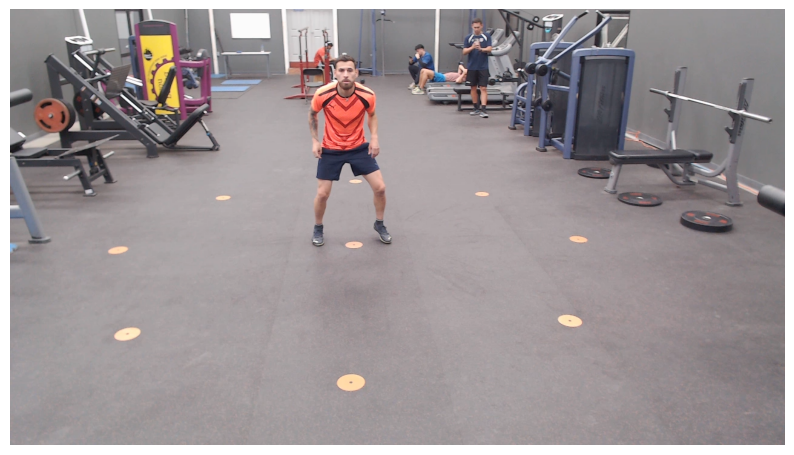

c:\Users\franf\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Left knee coordinates: ( 611 , 294 )
Left ankle coordinates: ( 611 , 352 )
Left heel coordinates: ( 605 , 358 )
Left foot index coordinates: ( 623 , 380 )
Right knee coordinates: ( 515 , 305 )
Right ankle coordinates: ( 509 , 359 )
Right heel coordinates: ( 511 , 364 )
Right foot index coordinates: ( 511 , 386 )


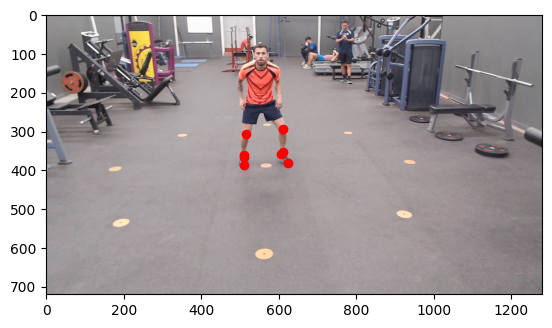

In [6]:
# Loading the image using OpenCV.
img = cv2.imread("videoframe_0.jpg")

# Getting the image's width and height.
img_width = img.shape[1]
img_height = img.shape[0]

# Creating a figure and a set of axes.
fig, ax = plt.subplots(figsize=(10, 10))
ax.axis('off')
ax.imshow(img[...,::-1])
plt.show()

# Initializing the Pose and Drawing modules of MediaPipe.
mp_pose = mp.solutions.pose
mp_drawing = mp.solutions.drawing_utils

with mp_pose.Pose(static_image_mode=True) as pose:
    """
    This function utilizes the MediaPipe library to detect and draw 'landmarks'
    (reference points) on an image. 'Landmarks' are points of interest
    that represent various body parts detected in the image.

    Args:
        static_image_mode: a boolean to inform if the image is static (True) or sequential (False).
    """

    # Make a copy of the original image.
    annotated_img = img.copy()

    # Processes the image.
    results = pose.process(img)

    # Set the circle radius for drawing the 'landmarks'.
    # The radius is scaled as a percentage of the image's height.
    circle_radius = int(.007 * img_height)

    # Specifies the drawing style for the 'landmarks'.
    point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)

    # Draws the 'landmarks' on the image.
    mp_drawing.draw_landmarks(annotated_img,
                              landmark_list=results.pose_landmarks,
                              landmark_drawing_spec=point_spec)

# Make a copy of the original image.
annotated_img = img.copy()
# Specifies the drawing style for landmark connections.
line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)
# Draws both the landmark points and connections.
mp_drawing.draw_landmarks(
annotated_img,
landmark_list=results.pose_landmarks,
connections=mp_pose.POSE_CONNECTIONS,
landmark_drawing_spec=point_spec,
connection_drawing_spec=line_spec
)

# Select the coordinates of the points of interest.
l_knee_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * img_width)
l_knee_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * img_height)

l_ankle_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * img_width)
l_ankle_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * img_height)

l_heel_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * img_width)
l_heel_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * img_height)

l_foot_index_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * img_width)
l_foot_index_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * img_height)


r_knee_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x * img_width)
r_knee_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y * img_height)

r_ankle_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x * img_width)
r_ankle_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y * img_height)

r_heel_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * img_width)
r_heel_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * img_height)

r_foot_index_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x * img_width)
r_foot_index_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y * img_height)

# Print the coordinates on the screen.
print('Left knee coordinates: (', l_knee_x,',',l_knee_y,')' )
print('Left ankle coordinates: (', l_ankle_x,',',l_ankle_y,')' )
print('Left heel coordinates: (', l_heel_x,',',l_heel_y,')' )
print('Left foot index coordinates: (', l_foot_index_x,',',l_foot_index_y,')' )

print('Right knee coordinates: (', r_knee_x,',',r_knee_y,')' )
print('Right ankle coordinates: (', r_ankle_x,',',r_ankle_y,')' )
print('Right heel coordinates: (', r_heel_x,',',r_heel_y,')' )
print('Right foot index coordinates: (', r_foot_index_x,',',r_foot_index_y,')' )


# Displaying a graph with the selected points.
fig, ax = plt.subplots()
ax.imshow(img[:, :, ::-1])
ax.plot([l_knee_x, l_ankle_x, l_heel_x, l_foot_index_x, r_knee_x, r_ankle_x, r_heel_x, r_foot_index_x], [l_knee_y, l_ankle_y, l_heel_y, l_foot_index_y, r_knee_y, r_ankle_y, r_heel_y, r_foot_index_y], 'ro')
plt.show()

plt.savefig('testMediaPipe.png')

In [12]:
import glob
def mediaPipeTest(cv_img):
    img = cv2.imread(cv_img)

    # Getting the image's width and height.
    img_width = img.shape[1]
    img_height = img.shape[0]

    # Creating a figure and a set of axes.
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.axis('off')
    ax.imshow(img[...,::-1])
    plt.show()

    # Initializing the Pose and Drawing modules of MediaPipe.
    mp_pose = mp.solutions.pose
    mp_drawing = mp.solutions.drawing_utils

    with mp_pose.Pose(static_image_mode=True) as pose:
        """
        This function utilizes the MediaPipe library to detect and draw 'landmarks'
        (reference points) on an image. 'Landmarks' are points of interest
        that represent various body parts detected in the image.

        Args:
            static_image_mode: a boolean to inform if the image is static (True) or sequential (False).
        """

        # Make a copy of the original image.
        annotated_img = img.copy()

        # Processes the image.
        results = pose.process(img)

        # Set the circle radius for drawing the 'landmarks'.
        # The radius is scaled as a percentage of the image's height.
        circle_radius = int(.007 * img_height)

        # Specifies the drawing style for the 'landmarks'.
        point_spec = mp_drawing.DrawingSpec(color=(220, 100, 0), thickness=-1, circle_radius=circle_radius)

        # Draws the 'landmarks' on the image.
        mp_drawing.draw_landmarks(annotated_img,
                                landmark_list=results.pose_landmarks,
                                landmark_drawing_spec=point_spec)

    # Make a copy of the original image.
    annotated_img = img.copy()
    # Specifies the drawing style for landmark connections.
    line_spec = mp_drawing.DrawingSpec(color=(0, 255, 0), thickness=2)
    # Draws both the landmark points and connections.
    mp_drawing.draw_landmarks(
    annotated_img,
    landmark_list=results.pose_landmarks,
    connections=mp_pose.POSE_CONNECTIONS,
    landmark_drawing_spec=point_spec,
    connection_drawing_spec=line_spec
    )

    # Select the coordinates of the points of interest.
    l_knee_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].x * img_width)
    l_knee_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_KNEE].y * img_height)

    l_ankle_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].x * img_width)
    l_ankle_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_ANKLE].y * img_height)

    l_heel_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].x * img_width)
    l_heel_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_HEEL].y * img_height)

    l_foot_index_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].x * img_width)
    l_foot_index_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.LEFT_FOOT_INDEX].y * img_height)


    r_knee_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].x * img_width)
    r_knee_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_KNEE].y * img_height)

    r_ankle_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].x * img_width)
    r_ankle_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_ANKLE].y * img_height)

    r_heel_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].x * img_width)
    r_heel_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_HEEL].y * img_height)

    r_foot_index_x = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].x * img_width)
    r_foot_index_y = int(results.pose_landmarks.landmark[mp_pose.PoseLandmark.RIGHT_FOOT_INDEX].y * img_height)

    # Print the coordinates on the screen.
    print('Left knee coordinates: (', l_knee_x,',',l_knee_y,')' )
    print('Left ankle coordinates: (', l_ankle_x,',',l_ankle_y,')' )
    print('Left heel coordinates: (', l_heel_x,',',l_heel_y,')' )
    print('Left foot index coordinates: (', l_foot_index_x,',',l_foot_index_y,')' )

    print('Right knee coordinates: (', r_knee_x,',',r_knee_y,')' )
    print('Right ankle coordinates: (', r_ankle_x,',',r_ankle_y,')' )
    print('Right heel coordinates: (', r_heel_x,',',r_heel_y,')' )
    print('Right foot index coordinates: (', r_foot_index_x,',',r_foot_index_y,')' )


    # Displaying a graph with the selected points.
    fig, ax = plt.subplots()
    ax.imshow(img[:, :, ::-1])
    ax.plot([l_knee_x, l_ankle_x, l_heel_x, l_foot_index_x, r_knee_x, r_ankle_x, r_heel_x, r_foot_index_x], [l_knee_y, l_ankle_y, l_heel_y, l_foot_index_y, r_knee_y, r_ankle_y, r_heel_y, r_foot_index_y], 'ro')
    plt.show()

    plt.savefig('testMediaPipe'+cv_img)

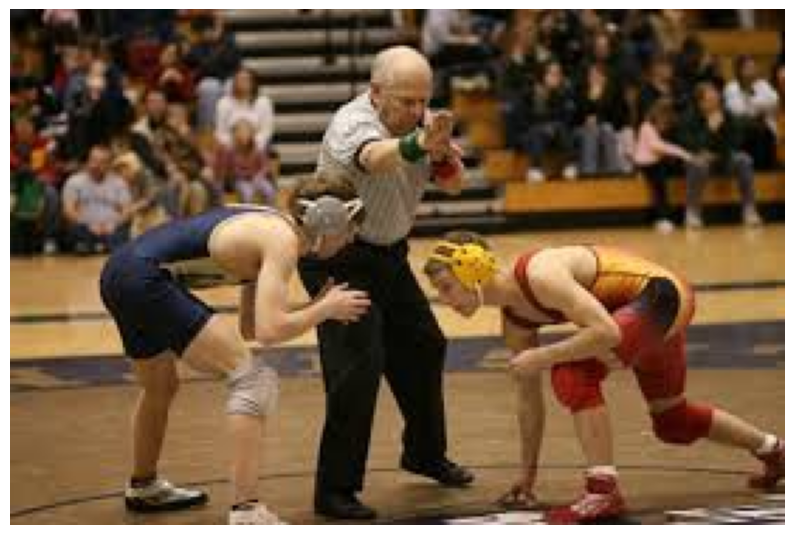

Left knee coordinates: ( 113 , 118 )
Left ankle coordinates: ( 144 , 155 )
Left heel coordinates: ( 144 , 151 )
Left foot index coordinates: ( 139 , 165 )
Right knee coordinates: ( 116 , 122 )
Right ankle coordinates: ( 143 , 156 )
Right heel coordinates: ( 144 , 150 )
Right foot index coordinates: ( 142 , 166 )


c:\Users\franf\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


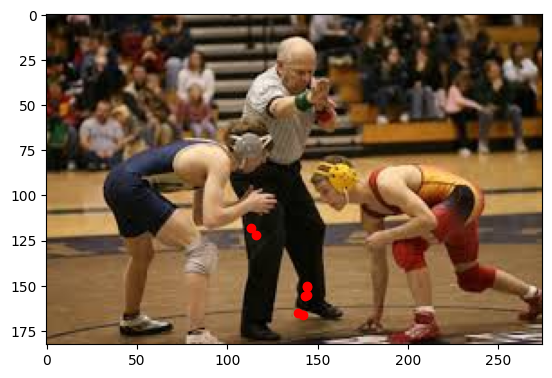

<Figure size 640x480 with 0 Axes>

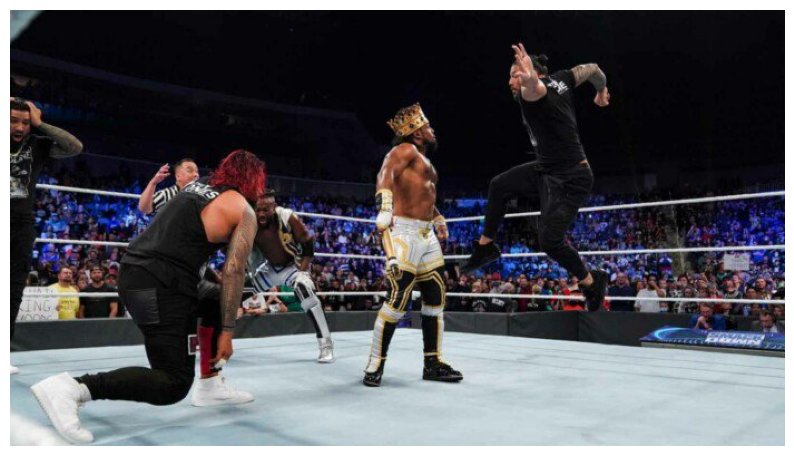

Left knee coordinates: ( 219 , 227 )
Left ankle coordinates: ( 193 , 291 )
Left heel coordinates: ( 182 , 300 )
Left foot index coordinates: ( 207 , 314 )
Right knee coordinates: ( 148 , 329 )
Right ankle coordinates: ( 60 , 344 )
Right heel coordinates: ( 45 , 344 )
Right foot index coordinates: ( 64 , 379 )


c:\Users\franf\AppData\Local\Programs\Python\Python311\Lib\site-packages\google\protobuf\symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


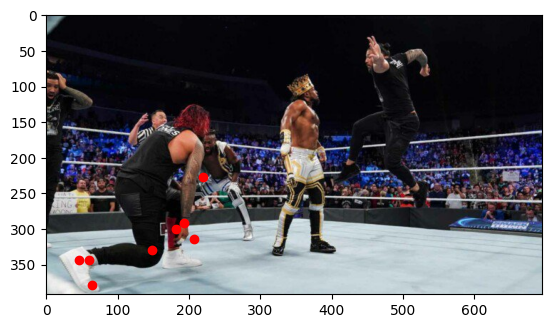

<Figure size 640x480 with 0 Axes>

In [14]:
mediaPipeTest('0b04a0293f.jpg')
mediaPipeTest('0ba4662909.jpg')

In [ ]:
import cv2
import mediapipe as mp
import numpy as np
from google.colab.patches import cv2_imshow

mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

video_path = '11_28_22-player9.webm'
cap = cv2.VideoCapture(video_path)

## Setup mediapipe instance
with mp_pose.Pose(min_detection_confidence=0.5, min_tracking_confidence=0.5) as pose:
    while cap.isOpened():
        ret, frame = cap.read()
        
        # Recolor image to RGB
        image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        image.flags.writeable = False
      
        # Make detection
        results = pose.process(image)
    
        # Recolor back to BGR
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        
        # Render detections
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS,
                                mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=2), 
                                mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2) 
                                 )               
        
        cv2_imshow(image)

        if cv2.waitKey(10) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()